#**1-KPPV**







###**Importation des bibliothèques:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn import metrics
from collections import Counter

### **Données d'apprentissage:**


In [ ]:
mean1 = [2, 2]
#mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]] #
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-1, -1]
#mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]] #
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128),np.ones(128)))


###**Données de test:**

In [ ]:
test1=np.transpose(np.random.multivariate_normal(mean1, cov1, 64))
test2=np.transpose(np.random.multivariate_normal(mean2, cov2,64))
test=np.concatenate((test1,test2), axis=1)

### **Définition de la variable K:**

In [ ]:
K=2

### **Définition de la fonction KPPV et de la fonction de distance euclidienne:**

In [ ]:
def kppv(x,appren,oracle,K):
  def distance_euclidienne (p1x,p2x,p1y,p2y):
    return np.sqrt((p2x-p1x)**2 + (p2y-p1y)**2)
  clas=[]
  v=len(x[0])
  for i in range(0,v):
      dis=[]
      clss=[]
      kppp=[]
      v2=len(appren[0])
      j=0
      while j<v2:
         dis.append(distance_euclidienne(appren[0][j],x[0][i],appren[1][j],x[1][i]) )
         j=j+1
      clss.append(dis)
      clss.append(oracle)
      clss=np.transpose(clss)
      clss = clss[clss[:,0].argsort()]
      clss=np.transpose(clss)
      kppp=clss[1][:K]
      ms=Counter(kppp).most_common()[0][0]
      clas.append(ms)
  res = np.array(clas)
  return res

### **Affichage des données d'apprentissage et des données de test:**

[]

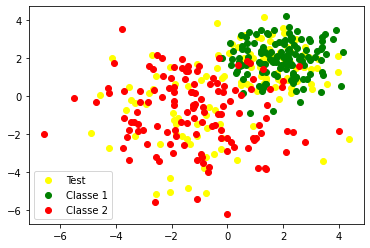

In [ ]:
ax = plt.subplot(111)
plt.scatter(test[0], test[1], color = 'yellow')
plt.scatter(data1[0], data1[1], color = 'green')
plt.scatter(data2[0], data2[1], color = 'red')

ax.legend(( 'Test','Classe 1','Classe 2',))
plt.plot()

### **Définition de la fonction d'affichage des classes des données:**

In [ ]:
def affiche_classe(x,clas,K):
 for k in range(0,K):
  ind=(clas==k)
  plt.plot(x[0,ind],x[1,ind],"o")
 plt.show()


### **Affichage/erreur**

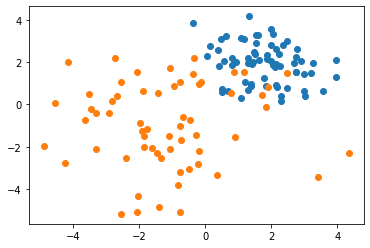

In [ ]:
clas=kppv(test,data,oracle,K)
affiche_classe(test,clas,2)

In [ ]:
test_erreur = np.concatenate((np.zeros(64),np.ones(64)))
print('Précision',metrics.accuracy_score(test_erreur, clas))
print('Erreur',1-metrics.accuracy_score(test_erreur, clas))


Précision 0.8828125
Erreur 0.1171875


# **2-Perceptron**

### **Importation des bibliothèques:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Données de test:**

In [ ]:
# Données de test
mean1 = [0, 5]
cov1 = [[1, 0], [0, 1]] #
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-1, -3]
cov2 = [[4, 0], [0, 4]] #
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128)-1,np.ones(128)))


### **Définition de la fonction perceptron:**

In [ ]:
def perceptron(x,w,active):
  somme=(w[0]+(w[1]*x[0]+w[2]*x[1]))
  if(active==0):#fonction d'activation
    z=(np.sign(somme))
  else:         #z=sign(w1*x1+w2*x2+b)
    z=(np.tanh(somme))
  return z      #z=tanh(w1*x1+w2*x2+b)

### **Définition de la fonction apprentissage:**

In [ ]:
def apprentissage(x,yd,active):
  erreur=[] #tableau contient l'erreur de chaque itération
  w=[0.5,1,1]   #initialisation de w1=1 w2=1 b=0.5
  mdiff=0       #initialiser a 0 mdiff (somme des erreurs de chaque exemples)
  for i in range (0,100): #100 itération
    for j in range (256): #Parcourir toutes les entrées
      y_a=perceptron([x[0][j],x[1][j]],w,active)
      if (y_a!=yd[j]):
        w[1]=w[1]+(0.1*(yd[j]-y_a)*x[0][j])  #Mise a jour des poids
        w[2]=w[2]+(0.1*(yd[j]-y_a)*x[1][j])
        w[0]=w[0]+(0.1*(yd[j]-y_a))          #Mise a jour de bias
        mdiff= mdiff + (yd[i]-y_a)**2
    print('Itération ',i)
    print('W1=',w[1])
    print('W2=',w[2])
    print('b=',w[0])
    erreur.append(mdiff)
  print(erreur)

  return w,erreur


### **Définition de la fonction d'affichage:**

In [ ]:
def affiche_classe(x,clas,K,w):
 t=[np.min(x[0,:]),np.max(x[0,:])]
 z=[(-w[0]-w[1]*np.min(x[0,:]))/w[2],(-w[0]-w[1]*np.max(x[0,:]))/w[2]]
 plt.plot(t,z)
 ind=(clas==-1)
 plt.plot(x[0,ind],x[1,ind],"o")
 ind=(clas==1)
 plt.plot(x[0,ind],x[1,ind],"o")
 plt.show()



### **Résultat:**

Itération  0
W1= -0.573813841086814
W2= -0.8255551703602853
b= 1.0223473462966555
Itération  1
W1= -0.5665617348657448
W2= -0.8475290608119134
b= 1.2364378168796737
Itération  2
W1= -0.5547166005662516
W2= -0.8948946367225864
b= 1.3955785938644234
Itération  3
W1= -0.5450189325245882
W2= -0.9390574096874588
b= 1.5272888648614358
Itération  4
W1= -0.5365603544444169
W2= -0.979516171011999
b= 1.6413950181919308
Itération  5
W1= -0.5287927041773942
W2= -1.0168035695538344
b= 1.7431413505560864
Itération  6
W1= -0.521429511780692
W2= -1.05146727633758
b= 1.8356815704586054
Itération  7
W1= -0.5143166078069579
W2= -1.083959259326479
b= 1.9210632996034214
Itération  8
W1= -0.5073679394198297
W2= -1.114634742512024
b= 2.0006932961726003
Itération  9
W1= -0.5005339649666566
W2= -1.1437707459594864
b= 2.075580925492199
Itération  10
W1= -0.4937855337614777
W2= -1.1715845893490235
b= 2.146475797626803
Itération  11
W1= -0.4871053274673968
W2= -1.1982486077025873
b= 2.213950444393789
Itération  1

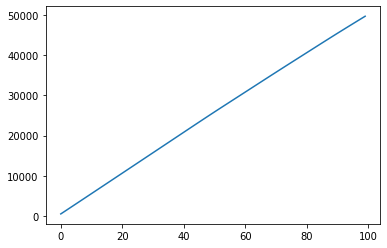

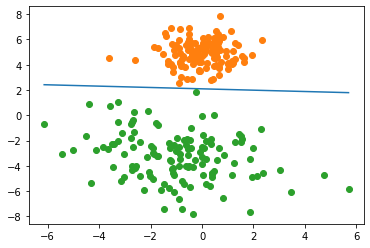

In [ ]:
w,mdiff=apprentissage(data,oracle,1)
plt.plot(mdiff)
plt.show()
affiche_classe(data,oracle,2,w)